# Agrupamento por K-Means

Usado para agrupar dados não rotulados em clusters com base em suas características. O K-Means visa encontrar grupos nos dados, com um número de grupos (ou clusters) especificado. Sua utilidade está em explorar padrões em conjuntos de dados. 

O funcionamento básico do algoritmo K-Means é o seguinte:

1. Inicializa os centróides dos clusters de forma aleatória.
2. Atribui cada ponto de dados ao centróide mais próximo, formando clusters.
3. Calcula os novos centróides de cada cluster, com base nos pontos atribuídos a eles.
4. Repete os passos 2 e 3 até que os centróides não mudem significativamente ou até que um número máximo de iterações seja atingido.

## Configurando dados

In [17]:
# Importando biblioteca pandas
import pandas as pd

# Importando classe MinMaxScaler da biblioteca scikit-learn
from sklearn.preprocessing import MinMaxScaler

# Importando dados
df = pd.read_csv('dados/diabetes.csv')

for coluna in df.columns:
    
    # Calculando mediana
    mediana_coluna = df[coluna].median()
    
    # Substitui os valores nulos pela mediana da coluna usando loc
    df.loc[df[coluna].isnull(), coluna] = mediana_coluna

    # Normalizando dados
    df[coluna] = MinMaxScaler().fit_transform(df[[coluna]])

# Visualizando dados
df.head(3)

,preg,plas,pres,skin,insu,mass,pedi,age
0,0.352941,0.743719,0.590164,0.353535,0.0,0.500745,0.269183,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.0,0.396423,0.150672,0.166667
2,0.470588,0.919598,0.524590,0.232323,0.0,0.347243,0.288505,0.183333


## Agrupamento de Dados

In [18]:
# Importando a classe KMeans do módulo cluster da biblioteca scikit-learn
from sklearn.cluster import KMeans

km = KMeans(
        n_clusters=2, # número de clusters desejado (neste caso, 2)
        init='k-means++', # inicialização dos centróides ('k-means++' para inicialização inteligente)
        max_iter=300, # máximo de iterações para cada execução do algoritmo (padrão: 300)
        n_init=10, # vezes que o algoritmo será executado com diferentes centróides iniciais (padrão: 10)
        random_state=0) # semente para a geração de números aleatórios (garante reproducibilidade dos resultados)

# Aplicando o algoritmo KMeans aos dados do DataFrame
km.fit(df)

KMeans(n_clusters=2, n_init=10, random_state=0)

## Visualização de Dados 2D

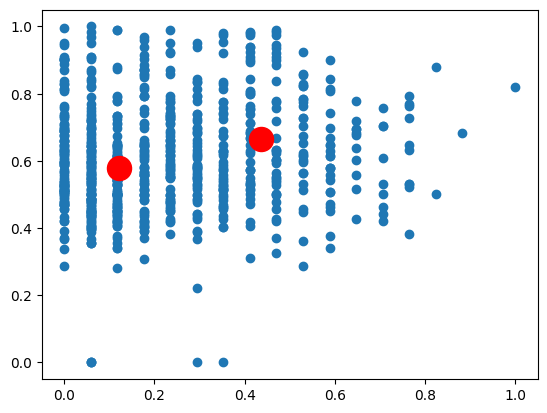

In [20]:
# Importando a biblioteca matplotlib para visualização de dados
import matplotlib.pyplot as plt

# Obtendo as coordenadas dos centróides dos clusters encontrados pelo KMeans
centroids = km.cluster_centers_

# Criando um gráfico de dispersão 2D dos dados
plt.scatter(df.iloc[:,0], df.iloc[:,1]) # Plot dos dados originais
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=300) # Plot dos centróides em vermelho

# Visualizando dados agrupados em volta de centróide em gráfico 2d
plt.show()

## Visualização de Dados 3D

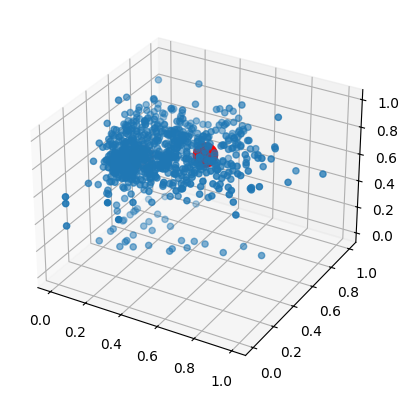

In [22]:
# Importando a classe Axes3D do módulo mpl_toolkits.mplot3d para plotagem em 3D
from mpl_toolkits.mplot3d import Axes3D

# Criando uma figura 3D
fig = plt.figure()

# Adicionando um subplot 3D à figura
ax = fig.add_subplot(111, projection='3d')

# Plotando os pontos tridimensionais dos dados originais
ax.scatter(df.iloc[:, 0], df.iloc[:, 1], df.iloc[:, 2])

# Plotando os centróides tridimensionais dos clusters em vermelho
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c='red', s=300)

# Visualizando dados agrupados em volta de centróide em gráfico 3d
plt.show()

## Considerações Finais

Como pode ser visto nos gráficos 2D e 3D, após o agrupamento, os dados tendem a se concentrar em volta dos centro